## Домашнее задание к уроку 3. TensorFlow

1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston.


2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?


3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

(*) Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews . Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

COVID 19 диагностика https://www.kaggle.com/andrewmvd/covid19-ct-scans

Распознавание изображений цифр в представлении языка жестов https://www.kaggle.com/ardamavi/sign-language-digits-dataset

In [1]:
# Загрузка необходимых библиотек

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [2]:
# Загрузка данных

(train_data,train_labels), (test_data,test_labels) = boston_housing.load_data()

print('train_data.shape', train_data.shape)
print('test_data.shape ', test_data.shape)

train_data.shape (404, 13)
test_data.shape  (102, 13)


In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns = column_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


---

### Модель 1

In [ ]:
# Нормализация

scaler = MinMaxScaler((-1,1))
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(test_data)

print(X_train[0])

In [ ]:
# Линейные активации, потери - среднеквадратичная ошибка, 
# метрика -//-, 10e по 1 примеру в батче

boston_model1 = Sequential([
    Dense(20, activation = 'linear', input_shape = (13,)),
    Dense(20, activation = 'linear'),
    Dense(1, activation = 'linear')])

boston_model1.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ['mean_squared_error'])

boston_model1.summary()

In [ ]:
boston_history1 = boston_model1.fit(X_train, y_train,
                                    epochs = 10,
                                    batch_size = 1,
                                    validation_split = 0.2)

In [ ]:
plt.plot(boston_history1.history['val_mean_squared_error'] ,label = 'val')
plt.plot(boston_history1.history['mean_squared_error'] ,label = 'train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.title('MSE e')
plt.show()

In [ ]:
# Коэф детерминации на тесте

y_test_pred = boston_model1.predict(X_test)
r2_score(y_test, y_test_pred)

---

### Модель 2

In [4]:
(train_data,train_labels), (test_data,test_labels) = boston_housing.load_data()

# Смена порядка

order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [5]:
# Нормализация

scaler = MinMaxScaler((-1,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[0])

[-0.99911026  0.05       -0.64369501 -1.         -0.91769547  0.06661503
 -0.12049434  0.29168015 -0.56521739 -0.59847036 -0.14893617  1.
 -0.67604857]


In [7]:
# Активации relu, потери - среднеквадратичная ошибка, 
# метрика средняя абсолютная ошибка, 200e по 1 примеру в батче

boston_model2 = Sequential([
    Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(1, )
])


boston_model2.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
                      loss='mean_squared_error',
                      metrics=['mean_absolute_error'])

boston_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [8]:
boston_history2 = boston_model2.fit(train_data, train_labels,
                                    epochs = 200,
                                    batch_size = 1, validation_split = 0.2)

2022-04-15 17:06:54.421936: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/200
323/323 [==============================] - 1s 3ms/step - loss: 274.6948 - mean_absolute_error: 13.6643 - val_loss: 46.0004 - val_mean_absolute_error: 4.8385
Epoch 2/200
323/323 [==============================] - 0s 674us/step - loss: 41.0918 - mean_absolute_error: 4.5125 - val_loss: 31.9351 - val_mean_absolute_error: 3.3126
Epoch 3/200
323/323 [==============================] - 0s 641us/step - loss: 35.8528 - mean_absolute_error: 3.8025 - val_loss: 23.6023 - val_mean_absolute_error: 3.1152
Epoch 4/200
323/323 [==============================] - 0s 629us/step - loss: 17.7605 - mean_absolute_error: 2.8223 - val_loss: 26.3518 - val_mean_absolute_error: 4.0152
Epoch 5/200
323/323 [==============================] - 0s 640us/step - loss: 20.1764 - mean_absolute_error: 3.1335 - val_loss: 21.3126 - val_mean_absolute_error: 3.1537
Epoch 6/200
323/323 [==============================] - 0s 668us/step - loss: 20.9761 - mean_absolute_error: 3.2909 - val_loss: 21.0521 - val_mean_absolute_

323/323 [==============================] - 0s 636us/step - loss: 5.9523 - mean_absolute_error: 1.7702 - val_loss: 13.6310 - val_mean_absolute_error: 2.1308
Epoch 50/200
323/323 [==============================] - 0s 637us/step - loss: 8.2112 - mean_absolute_error: 1.8691 - val_loss: 13.6022 - val_mean_absolute_error: 2.1914
Epoch 51/200
323/323 [==============================] - 0s 624us/step - loss: 8.3210 - mean_absolute_error: 1.8337 - val_loss: 14.6318 - val_mean_absolute_error: 2.2285
Epoch 52/200
323/323 [==============================] - 0s 619us/step - loss: 8.9039 - mean_absolute_error: 1.8643 - val_loss: 13.6205 - val_mean_absolute_error: 2.3239
Epoch 53/200
323/323 [==============================] - 0s 636us/step - loss: 9.7421 - mean_absolute_error: 2.0371 - val_loss: 14.1683 - val_mean_absolute_error: 2.3940
Epoch 54/200
323/323 [==============================] - 0s 636us/step - loss: 8.6997 - mean_absolute_error: 1.9663 - val_loss: 13.0888 - val_mean_absolute_error: 2.2866

323/323 [==============================] - 0s 621us/step - loss: 5.8060 - mean_absolute_error: 1.6957 - val_loss: 12.9983 - val_mean_absolute_error: 2.1967
Epoch 98/200
323/323 [==============================] - 0s 617us/step - loss: 5.6020 - mean_absolute_error: 1.4756 - val_loss: 13.4628 - val_mean_absolute_error: 2.1461
Epoch 99/200
323/323 [==============================] - 0s 615us/step - loss: 7.2900 - mean_absolute_error: 1.7405 - val_loss: 13.4164 - val_mean_absolute_error: 2.1593
Epoch 100/200
323/323 [==============================] - 0s 616us/step - loss: 5.9630 - mean_absolute_error: 1.6054 - val_loss: 13.8561 - val_mean_absolute_error: 2.0696
Epoch 101/200
323/323 [==============================] - 0s 618us/step - loss: 5.6771 - mean_absolute_error: 1.6439 - val_loss: 13.5476 - val_mean_absolute_error: 2.2472
Epoch 102/200
323/323 [==============================] - 0s 617us/step - loss: 6.2277 - mean_absolute_error: 1.6650 - val_loss: 14.3089 - val_mean_absolute_error: 2.0

323/323 [==============================] - 0s 619us/step - loss: 4.6952 - mean_absolute_error: 1.4887 - val_loss: 13.6719 - val_mean_absolute_error: 2.0778
Epoch 146/200
323/323 [==============================] - 0s 619us/step - loss: 4.4514 - mean_absolute_error: 1.4050 - val_loss: 14.0483 - val_mean_absolute_error: 2.0776
Epoch 147/200
323/323 [==============================] - 0s 619us/step - loss: 4.2607 - mean_absolute_error: 1.4385 - val_loss: 13.3382 - val_mean_absolute_error: 2.1376
Epoch 148/200
323/323 [==============================] - 0s 618us/step - loss: 4.9521 - mean_absolute_error: 1.4524 - val_loss: 15.0940 - val_mean_absolute_error: 2.5280
Epoch 149/200
323/323 [==============================] - 0s 621us/step - loss: 3.5279 - mean_absolute_error: 1.3457 - val_loss: 13.7310 - val_mean_absolute_error: 2.1328
Epoch 150/200
323/323 [==============================] - 0s 615us/step - loss: 3.7652 - mean_absolute_error: 1.3466 - val_loss: 15.9684 - val_mean_absolute_error: 2

323/323 [==============================] - 0s 617us/step - loss: 3.5591 - mean_absolute_error: 1.3085 - val_loss: 12.3308 - val_mean_absolute_error: 2.1865
Epoch 194/200
323/323 [==============================] - 0s 620us/step - loss: 4.0299 - mean_absolute_error: 1.3393 - val_loss: 14.2428 - val_mean_absolute_error: 2.1469
Epoch 195/200
323/323 [==============================] - 0s 613us/step - loss: 3.6031 - mean_absolute_error: 1.3341 - val_loss: 12.9408 - val_mean_absolute_error: 2.3828
Epoch 196/200
323/323 [==============================] - 0s 662us/step - loss: 4.2801 - mean_absolute_error: 1.4085 - val_loss: 15.8466 - val_mean_absolute_error: 2.5011
Epoch 197/200
323/323 [==============================] - 0s 622us/step - loss: 3.2521 - mean_absolute_error: 1.3009 - val_loss: 15.5792 - val_mean_absolute_error: 2.2287
Epoch 198/200
323/323 [==============================] - 0s 615us/step - loss: 4.1111 - mean_absolute_error: 1.3534 - val_loss: 13.3561 - val_mean_absolute_error: 2

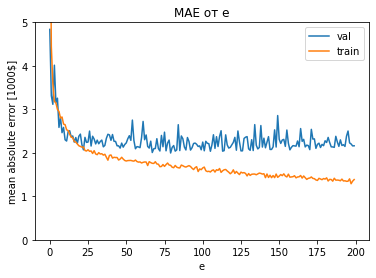

In [9]:
# Визуализация

plt.plot(boston_history2.history['val_mean_absolute_error'] ,label = 'val')
plt.plot(boston_history2.history['mean_absolute_error'] ,label = 'train')
plt.legend()
plt.xlabel('e')
plt.ylabel('mean absolute error [1000$]')
plt.title('MAE от e')
plt.ylim([0, 5])
plt.show()

In [10]:
result2 = []

# Коэфф детерминации на тесте

y_test_pred2 = boston_model2.predict(test_data)
r2_score(test_labels, y_test_pred2)

0.813864954133576

In [11]:
[loss, mae] = boston_model2.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2489.73


In [12]:
result2.append([r2_score(test_labels, y_test_pred2), loss, mae])
print(result2)

[[0.813864954133576, 15.494595527648926, 2.4897263050079346]]


### Прогнозирование

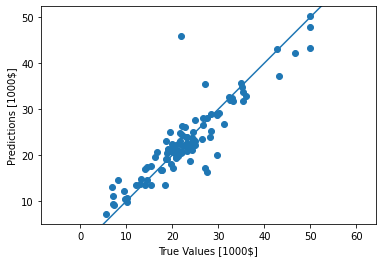

In [13]:
# Прогноз нескольких цен, используя данные теста

test_predictions = boston_model2.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

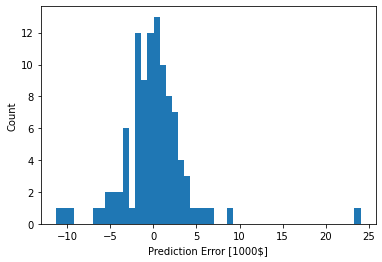

In [14]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")

---

### Модель 3

In [15]:
(train_data,train_labels), (test_data,test_labels) = boston_housing.load_data()

# Смена порядка

order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [16]:
# Нормализация

scaler = MinMaxScaler((-1,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[0])

[-0.99858851 -0.1        -0.78152493 -1.         -0.78600823  0.23082881
 -0.42533471  0.11687037 -0.65217391 -0.19694073 -0.44680851  0.96373998
 -0.83664459]


In [17]:
# Подготовка train_labels для sigmoid

min_y = train_labels.min()
max_y = train_labels.max() - min_y
train_labels = (train_labels - min_y) / max_y
test_labels = (test_labels - min_y) / max_y

In [19]:
# Активации relu, на выходе - sigmoid, потери - среднеквадратичная ошибка, 
# метрика средняя абсолютная ошибка, 200e по 1 примеру в батче

boston_model3 = Sequential([
    Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])


boston_model3.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
                     loss = 'mean_squared_error',
                     metrics = ['mean_absolute_error'])

boston_model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [20]:
boston_history3 = boston_model3.fit(train_data, train_labels, epochs = 200,
                                    batch_size = 1, validation_split = 0.2)

Epoch 1/200
323/323 [==============================] - 1s 951us/step - loss: 0.0385 - mean_absolute_error: 0.1380 - val_loss: 0.0199 - val_mean_absolute_error: 0.0893
Epoch 2/200
323/323 [==============================] - 0s 642us/step - loss: 0.0141 - mean_absolute_error: 0.0721 - val_loss: 0.0138 - val_mean_absolute_error: 0.0794
Epoch 3/200
323/323 [==============================] - 0s 650us/step - loss: 0.0111 - mean_absolute_error: 0.0699 - val_loss: 0.0138 - val_mean_absolute_error: 0.0681
Epoch 4/200
323/323 [==============================] - 0s 635us/step - loss: 0.0070 - mean_absolute_error: 0.0578 - val_loss: 0.0106 - val_mean_absolute_error: 0.0674
Epoch 5/200
323/323 [==============================] - 0s 637us/step - loss: 0.0070 - mean_absolute_error: 0.0576 - val_loss: 0.0095 - val_mean_absolute_error: 0.0637
Epoch 6/200
323/323 [==============================] - 0s 632us/step - loss: 0.0059 - mean_absolute_error: 0.0567 - val_loss: 0.0124 - val_mean_absolute_error: 0.066

Epoch 50/200
323/323 [==============================] - 0s 638us/step - loss: 0.0028 - mean_absolute_error: 0.0383 - val_loss: 0.0075 - val_mean_absolute_error: 0.0510
Epoch 51/200
323/323 [==============================] - 0s 640us/step - loss: 0.0020 - mean_absolute_error: 0.0321 - val_loss: 0.0069 - val_mean_absolute_error: 0.0513
Epoch 52/200
323/323 [==============================] - 0s 627us/step - loss: 0.0028 - mean_absolute_error: 0.0371 - val_loss: 0.0074 - val_mean_absolute_error: 0.0573
Epoch 53/200
323/323 [==============================] - 0s 622us/step - loss: 0.0017 - mean_absolute_error: 0.0294 - val_loss: 0.0071 - val_mean_absolute_error: 0.0541
Epoch 54/200
323/323 [==============================] - 0s 639us/step - loss: 0.0024 - mean_absolute_error: 0.0309 - val_loss: 0.0070 - val_mean_absolute_error: 0.0501
Epoch 55/200
323/323 [==============================] - 0s 631us/step - loss: 0.0022 - mean_absolute_error: 0.0361 - val_loss: 0.0068 - val_mean_absolute_error:

Epoch 99/200
323/323 [==============================] - 0s 633us/step - loss: 0.0014 - mean_absolute_error: 0.0272 - val_loss: 0.0079 - val_mean_absolute_error: 0.0522
Epoch 100/200
323/323 [==============================] - 0s 627us/step - loss: 0.0017 - mean_absolute_error: 0.0290 - val_loss: 0.0078 - val_mean_absolute_error: 0.0491
Epoch 101/200
323/323 [==============================] - 0s 627us/step - loss: 0.0015 - mean_absolute_error: 0.0280 - val_loss: 0.0075 - val_mean_absolute_error: 0.0529
Epoch 102/200
323/323 [==============================] - 0s 620us/step - loss: 0.0016 - mean_absolute_error: 0.0291 - val_loss: 0.0078 - val_mean_absolute_error: 0.0475
Epoch 103/200
323/323 [==============================] - 0s 624us/step - loss: 0.0015 - mean_absolute_error: 0.0286 - val_loss: 0.0089 - val_mean_absolute_error: 0.0643
Epoch 104/200
323/323 [==============================] - 0s 627us/step - loss: 0.0015 - mean_absolute_error: 0.0285 - val_loss: 0.0078 - val_mean_absolute_e

323/323 [==============================] - 0s 670us/step - loss: 0.0010 - mean_absolute_error: 0.0238 - val_loss: 0.0074 - val_mean_absolute_error: 0.0522
Epoch 148/200
323/323 [==============================] - 0s 675us/step - loss: 9.5919e-04 - mean_absolute_error: 0.0232 - val_loss: 0.0074 - val_mean_absolute_error: 0.0518
Epoch 149/200
323/323 [==============================] - 0s 666us/step - loss: 9.9598e-04 - mean_absolute_error: 0.0234 - val_loss: 0.0069 - val_mean_absolute_error: 0.0497
Epoch 150/200
323/323 [==============================] - 0s 670us/step - loss: 0.0012 - mean_absolute_error: 0.0255 - val_loss: 0.0071 - val_mean_absolute_error: 0.0515
Epoch 151/200
323/323 [==============================] - 0s 659us/step - loss: 0.0014 - mean_absolute_error: 0.0278 - val_loss: 0.0081 - val_mean_absolute_error: 0.0527
Epoch 152/200
323/323 [==============================] - 0s 673us/step - loss: 0.0012 - mean_absolute_error: 0.0249 - val_loss: 0.0084 - val_mean_absolute_error:

323/323 [==============================] - 0s 645us/step - loss: 8.2971e-04 - mean_absolute_error: 0.0201 - val_loss: 0.0092 - val_mean_absolute_error: 0.0558
Epoch 196/200
323/323 [==============================] - 0s 628us/step - loss: 0.0011 - mean_absolute_error: 0.0225 - val_loss: 0.0097 - val_mean_absolute_error: 0.0546
Epoch 197/200
323/323 [==============================] - 0s 643us/step - loss: 0.0011 - mean_absolute_error: 0.0222 - val_loss: 0.0095 - val_mean_absolute_error: 0.0596
Epoch 198/200
323/323 [==============================] - 0s 636us/step - loss: 0.0012 - mean_absolute_error: 0.0241 - val_loss: 0.0094 - val_mean_absolute_error: 0.0566
Epoch 199/200
323/323 [==============================] - 0s 661us/step - loss: 0.0011 - mean_absolute_error: 0.0230 - val_loss: 0.0100 - val_mean_absolute_error: 0.0571
Epoch 200/200
323/323 [==============================] - 0s 637us/step - loss: 0.0010 - mean_absolute_error: 0.0218 - val_loss: 0.0087 - val_mean_absolute_error: 0.0

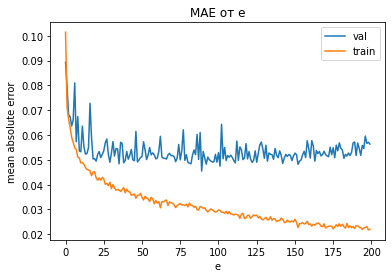

In [21]:
plt.plot(boston_history3.history['val_mean_absolute_error'] ,label = 'val')
plt.plot(boston_history3.history['mean_absolute_error'] ,label = 'train')
plt.legend()
plt.xlabel('e')
plt.ylabel('mean absolute error')
plt.title('MAE от e')
plt.show()

In [22]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива

y_test_pred3 = boston_model3.predict(test_data).flatten()

# Возвращаем к прежнему размеру

y_test_pred3 = y_test_pred3 * max_y + min_y 
test_labels = test_labels * max_y + min_y

In [23]:
# Коэфф детерминации на тесте

r2_score(test_labels, y_test_pred3)

0.7481016120657127

In [24]:
# Средний модуль отклонения 

[loss, mae] = boston_model3.evaluate(test_data, test_labels, verbose = 0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $22663.63


---

### Модель с 10-15 вариантами комбинаций

In [25]:
(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()

# Смена порядка

order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [26]:
# Нормализация

scaler = MinMaxScaler((-1,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [27]:
# Активации relu, потери - среднеквадратичная ошибка & средняя абсолютная ошибка & средняя абсолютная ошибка в процентах, 
# метрика средняя абсолютная ошибка & средняя абсолютная ошибка & средняя абсолютная ошибка в процентах, 200e по 1 примеру в батче

model = Sequential([
    Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(1, )
])

result = []

# Параметры

loss_space = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']
metrics_space = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']

for loss_item in loss_space:
    
    for metrics_item in metrics_space:
    
        model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
                      loss = loss_item,
                      metrics = [metrics_item])
        
        model.fit(train_data, train_labels,
                  epochs = 200,
                  batch_size = 1, validation_split = 0.2)
        
        # Коэфф детерминации на тестe
        
        y_test_pred = model.predict(test_data)
        
        [loss, metric] = model.evaluate(test_data, test_labels, verbose = 0)
               
        # Результаты
        
        result.append([loss_item, loss, metrics_item, metric, r2_score(test_labels, y_test_pred)])
        

Epoch 1/200
323/323 [==============================] - 1s 924us/step - loss: 288.4735 - mean_squared_error: 288.4735 - val_loss: 58.7924 - val_mean_squared_error: 58.7924
Epoch 2/200
323/323 [==============================] - 0s 643us/step - loss: 51.2203 - mean_squared_error: 51.2203 - val_loss: 40.0827 - val_mean_squared_error: 40.0827
Epoch 3/200
323/323 [==============================] - 0s 643us/step - loss: 28.9719 - mean_squared_error: 28.9719 - val_loss: 26.2721 - val_mean_squared_error: 26.2721
Epoch 4/200
323/323 [==============================] - 0s 680us/step - loss: 22.1294 - mean_squared_error: 22.1294 - val_loss: 24.8697 - val_mean_squared_error: 24.8697
Epoch 5/200
323/323 [==============================] - 0s 624us/step - loss: 18.1541 - mean_squared_error: 18.1541 - val_loss: 20.3975 - val_mean_squared_error: 20.3975
Epoch 6/200
323/323 [==============================] - 0s 672us/step - loss: 14.6459 - mean_squared_error: 14.6459 - val_loss: 18.1968 - val_mean_squared

323/323 [==============================] - 0s 655us/step - loss: 13.7530 - mean_squared_error: 13.7530 - val_loss: 10.9276 - val_mean_squared_error: 10.9276
Epoch 50/200
323/323 [==============================] - 0s 631us/step - loss: 6.5516 - mean_squared_error: 6.5516 - val_loss: 11.2507 - val_mean_squared_error: 11.2507
Epoch 51/200
323/323 [==============================] - 0s 708us/step - loss: 8.8909 - mean_squared_error: 8.8909 - val_loss: 14.8023 - val_mean_squared_error: 14.8023
Epoch 52/200
323/323 [==============================] - 0s 634us/step - loss: 9.4218 - mean_squared_error: 9.4218 - val_loss: 9.9965 - val_mean_squared_error: 9.9965
Epoch 53/200
323/323 [==============================] - 0s 662us/step - loss: 8.0776 - mean_squared_error: 8.0776 - val_loss: 12.9824 - val_mean_squared_error: 12.9824
Epoch 54/200
323/323 [==============================] - 0s 657us/step - loss: 8.4416 - mean_squared_error: 8.4416 - val_loss: 10.9673 - val_mean_squared_error: 10.9673
Epoch

Epoch 98/200
323/323 [==============================] - 0s 719us/step - loss: 8.9102 - mean_squared_error: 8.9102 - val_loss: 11.4980 - val_mean_squared_error: 11.4980
Epoch 99/200
323/323 [==============================] - 0s 699us/step - loss: 5.9496 - mean_squared_error: 5.9496 - val_loss: 12.4539 - val_mean_squared_error: 12.4539
Epoch 100/200
323/323 [==============================] - 0s 719us/step - loss: 4.4911 - mean_squared_error: 4.4911 - val_loss: 10.2015 - val_mean_squared_error: 10.2015
Epoch 101/200
323/323 [==============================] - 0s 713us/step - loss: 7.0344 - mean_squared_error: 7.0344 - val_loss: 11.9825 - val_mean_squared_error: 11.9825
Epoch 102/200
323/323 [==============================] - 0s 693us/step - loss: 7.5731 - mean_squared_error: 7.5731 - val_loss: 10.7529 - val_mean_squared_error: 10.7529
Epoch 103/200
323/323 [==============================] - 0s 708us/step - loss: 11.3910 - mean_squared_error: 11.3910 - val_loss: 12.1796 - val_mean_squared_e

323/323 [==============================] - 0s 659us/step - loss: 4.4488 - mean_squared_error: 4.4488 - val_loss: 11.8218 - val_mean_squared_error: 11.8218
Epoch 147/200
323/323 [==============================] - 0s 623us/step - loss: 4.6976 - mean_squared_error: 4.6976 - val_loss: 11.0752 - val_mean_squared_error: 11.0752
Epoch 148/200
323/323 [==============================] - 0s 656us/step - loss: 8.3629 - mean_squared_error: 8.3629 - val_loss: 10.7307 - val_mean_squared_error: 10.7307
Epoch 149/200
323/323 [==============================] - 0s 626us/step - loss: 4.5253 - mean_squared_error: 4.5253 - val_loss: 12.7166 - val_mean_squared_error: 12.7166
Epoch 150/200
323/323 [==============================] - 0s 625us/step - loss: 4.2107 - mean_squared_error: 4.2107 - val_loss: 10.2483 - val_mean_squared_error: 10.2483
Epoch 151/200
323/323 [==============================] - 0s 647us/step - loss: 6.9504 - mean_squared_error: 6.9504 - val_loss: 13.5381 - val_mean_squared_error: 13.5381


323/323 [==============================] - 0s 654us/step - loss: 5.1839 - mean_squared_error: 5.1839 - val_loss: 10.1329 - val_mean_squared_error: 10.1329
Epoch 195/200
323/323 [==============================] - 0s 637us/step - loss: 3.6650 - mean_squared_error: 3.6650 - val_loss: 12.6194 - val_mean_squared_error: 12.6194
Epoch 196/200
323/323 [==============================] - 0s 661us/step - loss: 2.6572 - mean_squared_error: 2.6572 - val_loss: 10.1698 - val_mean_squared_error: 10.1698
Epoch 197/200
323/323 [==============================] - 0s 623us/step - loss: 3.0395 - mean_squared_error: 3.0395 - val_loss: 10.8482 - val_mean_squared_error: 10.8482
Epoch 198/200
323/323 [==============================] - 0s 706us/step - loss: 3.4799 - mean_squared_error: 3.4799 - val_loss: 11.3555 - val_mean_squared_error: 11.3555
Epoch 199/200
323/323 [==============================] - 0s 676us/step - loss: 7.9612 - mean_squared_error: 7.9612 - val_loss: 11.6414 - val_mean_squared_error: 11.6414


Epoch 43/200
323/323 [==============================] - 0s 664us/step - loss: 3.7860 - mean_absolute_error: 1.3219 - val_loss: 10.9456 - val_mean_absolute_error: 2.3601
Epoch 44/200
323/323 [==============================] - 0s 633us/step - loss: 2.8758 - mean_absolute_error: 1.2244 - val_loss: 10.0170 - val_mean_absolute_error: 2.2556
Epoch 45/200
323/323 [==============================] - 0s 625us/step - loss: 3.4657 - mean_absolute_error: 1.3905 - val_loss: 11.1006 - val_mean_absolute_error: 2.4411
Epoch 46/200
323/323 [==============================] - 0s 643us/step - loss: 3.0540 - mean_absolute_error: 1.2034 - val_loss: 11.6032 - val_mean_absolute_error: 2.5794
Epoch 47/200
323/323 [==============================] - 0s 647us/step - loss: 3.5156 - mean_absolute_error: 1.3079 - val_loss: 10.8180 - val_mean_absolute_error: 2.3240
Epoch 48/200
323/323 [==============================] - 0s 668us/step - loss: 4.4199 - mean_absolute_error: 1.2280 - val_loss: 11.2916 - val_mean_absolute_

323/323 [==============================] - 0s 639us/step - loss: 2.1523 - mean_absolute_error: 1.0270 - val_loss: 12.0256 - val_mean_absolute_error: 2.4931
Epoch 92/200
323/323 [==============================] - 0s 656us/step - loss: 3.1854 - mean_absolute_error: 1.1910 - val_loss: 12.7208 - val_mean_absolute_error: 2.5060
Epoch 93/200
323/323 [==============================] - 0s 668us/step - loss: 3.0104 - mean_absolute_error: 1.2211 - val_loss: 11.9831 - val_mean_absolute_error: 2.4397
Epoch 94/200
323/323 [==============================] - 0s 657us/step - loss: 3.2660 - mean_absolute_error: 1.1670 - val_loss: 11.3372 - val_mean_absolute_error: 2.3412
Epoch 95/200
323/323 [==============================] - 0s 663us/step - loss: 4.5574 - mean_absolute_error: 1.3183 - val_loss: 11.3982 - val_mean_absolute_error: 2.4359
Epoch 96/200
323/323 [==============================] - 0s 657us/step - loss: 2.5108 - mean_absolute_error: 1.1051 - val_loss: 13.1358 - val_mean_absolute_error: 2.6973

323/323 [==============================] - 0s 666us/step - loss: 2.8592 - mean_absolute_error: 1.1649 - val_loss: 13.9594 - val_mean_absolute_error: 2.7125
Epoch 140/200
323/323 [==============================] - 0s 656us/step - loss: 2.1093 - mean_absolute_error: 0.9745 - val_loss: 12.9548 - val_mean_absolute_error: 2.5927
Epoch 141/200
323/323 [==============================] - 0s 630us/step - loss: 3.0688 - mean_absolute_error: 1.1566 - val_loss: 12.0067 - val_mean_absolute_error: 2.3694
Epoch 142/200
323/323 [==============================] - 0s 645us/step - loss: 2.5276 - mean_absolute_error: 1.0698 - val_loss: 12.2965 - val_mean_absolute_error: 2.4169
Epoch 143/200
323/323 [==============================] - 0s 649us/step - loss: 2.2064 - mean_absolute_error: 1.0367 - val_loss: 10.5611 - val_mean_absolute_error: 2.2277
Epoch 144/200
323/323 [==============================] - 0s 651us/step - loss: 3.2651 - mean_absolute_error: 1.1266 - val_loss: 13.3222 - val_mean_absolute_error: 2

323/323 [==============================] - 0s 643us/step - loss: 1.6394 - mean_absolute_error: 0.9270 - val_loss: 11.8895 - val_mean_absolute_error: 2.3453
Epoch 188/200
323/323 [==============================] - 0s 622us/step - loss: 3.4843 - mean_absolute_error: 1.1201 - val_loss: 14.0169 - val_mean_absolute_error: 2.5785
Epoch 189/200
323/323 [==============================] - 0s 627us/step - loss: 2.6907 - mean_absolute_error: 1.0695 - val_loss: 12.4047 - val_mean_absolute_error: 2.3973
Epoch 190/200
323/323 [==============================] - 0s 638us/step - loss: 2.0643 - mean_absolute_error: 1.0264 - val_loss: 14.7551 - val_mean_absolute_error: 2.8824
Epoch 191/200
323/323 [==============================] - 0s 629us/step - loss: 2.5751 - mean_absolute_error: 1.0619 - val_loss: 12.8535 - val_mean_absolute_error: 2.5127
Epoch 192/200
323/323 [==============================] - 0s 639us/step - loss: 2.1841 - mean_absolute_error: 1.0642 - val_loss: 12.7403 - val_mean_absolute_error: 2

323/323 [==============================] - 0s 645us/step - loss: 1.6604 - mean_absolute_percentage_error: 4.2774 - val_loss: 13.2219 - val_mean_absolute_percentage_error: 14.4491
Epoch 32/200
323/323 [==============================] - 0s 637us/step - loss: 3.2939 - mean_absolute_percentage_error: 5.6619 - val_loss: 12.7469 - val_mean_absolute_percentage_error: 13.1302
Epoch 33/200
323/323 [==============================] - 0s 642us/step - loss: 2.0485 - mean_absolute_percentage_error: 4.9041 - val_loss: 13.5221 - val_mean_absolute_percentage_error: 13.4796
Epoch 34/200
323/323 [==============================] - 0s 668us/step - loss: 2.0801 - mean_absolute_percentage_error: 4.5785 - val_loss: 12.3740 - val_mean_absolute_percentage_error: 13.1079
Epoch 35/200
323/323 [==============================] - 0s 667us/step - loss: 2.3030 - mean_absolute_percentage_error: 4.8455 - val_loss: 12.5429 - val_mean_absolute_percentage_error: 12.9093
Epoch 36/200
323/323 [==============================]

Epoch 74/200
323/323 [==============================] - 0s 655us/step - loss: 2.2627 - mean_absolute_percentage_error: 4.7492 - val_loss: 13.1249 - val_mean_absolute_percentage_error: 13.3118
Epoch 75/200
323/323 [==============================] - 0s 643us/step - loss: 1.5965 - mean_absolute_percentage_error: 4.6627 - val_loss: 13.7190 - val_mean_absolute_percentage_error: 14.2018
Epoch 76/200
323/323 [==============================] - 0s 679us/step - loss: 2.1956 - mean_absolute_percentage_error: 5.0282 - val_loss: 14.1035 - val_mean_absolute_percentage_error: 14.3902
Epoch 77/200
323/323 [==============================] - 0s 653us/step - loss: 1.6417 - mean_absolute_percentage_error: 4.4205 - val_loss: 14.1801 - val_mean_absolute_percentage_error: 14.3536
Epoch 78/200
323/323 [==============================] - 0s 652us/step - loss: 1.4543 - mean_absolute_percentage_error: 4.1515 - val_loss: 13.8428 - val_mean_absolute_percentage_error: 13.9300
Epoch 79/200
323/323 [==================

323/323 [==============================] - 0s 650us/step - loss: 1.7508 - mean_absolute_percentage_error: 4.4820 - val_loss: 13.8310 - val_mean_absolute_percentage_error: 13.4199
Epoch 117/200
323/323 [==============================] - 0s 655us/step - loss: 1.4723 - mean_absolute_percentage_error: 4.2369 - val_loss: 14.9718 - val_mean_absolute_percentage_error: 13.5824
Epoch 118/200
323/323 [==============================] - 0s 635us/step - loss: 1.7164 - mean_absolute_percentage_error: 4.4391 - val_loss: 15.6225 - val_mean_absolute_percentage_error: 13.7194
Epoch 119/200
323/323 [==============================] - 0s 650us/step - loss: 2.0167 - mean_absolute_percentage_error: 4.7602 - val_loss: 15.2493 - val_mean_absolute_percentage_error: 14.9348
Epoch 120/200
323/323 [==============================] - 0s 652us/step - loss: 1.7339 - mean_absolute_percentage_error: 4.6121 - val_loss: 13.3812 - val_mean_absolute_percentage_error: 13.1136
Epoch 121/200
323/323 [==========================

323/323 [==============================] - 0s 653us/step - loss: 1.6103 - mean_absolute_percentage_error: 4.5808 - val_loss: 14.0006 - val_mean_absolute_percentage_error: 13.8054
Epoch 159/200
323/323 [==============================] - 0s 642us/step - loss: 1.4287 - mean_absolute_percentage_error: 4.2501 - val_loss: 13.9897 - val_mean_absolute_percentage_error: 13.4090
Epoch 160/200
323/323 [==============================] - 0s 687us/step - loss: 1.3480 - mean_absolute_percentage_error: 4.2949 - val_loss: 13.2801 - val_mean_absolute_percentage_error: 13.0109
Epoch 161/200
323/323 [==============================] - 0s 649us/step - loss: 1.5995 - mean_absolute_percentage_error: 4.0812 - val_loss: 13.3058 - val_mean_absolute_percentage_error: 12.9305
Epoch 162/200
323/323 [==============================] - 0s 653us/step - loss: 1.8380 - mean_absolute_percentage_error: 4.5049 - val_loss: 14.1512 - val_mean_absolute_percentage_error: 13.4266
Epoch 163/200
323/323 [==========================

323/323 [==============================] - 0s 640us/step - loss: 1.3597 - mean_absolute_percentage_error: 3.8725 - val_loss: 14.4923 - val_mean_absolute_percentage_error: 13.5682
Epoch 1/200
323/323 [==============================] - 1s 873us/step - loss: 1.0485 - mean_squared_error: 2.0887 - val_loss: 2.4193 - val_mean_squared_error: 12.9735
Epoch 2/200
323/323 [==============================] - 0s 623us/step - loss: 0.9489 - mean_squared_error: 1.6718 - val_loss: 2.5343 - val_mean_squared_error: 13.5912
Epoch 3/200
323/323 [==============================] - 0s 632us/step - loss: 0.9094 - mean_squared_error: 1.4435 - val_loss: 2.7256 - val_mean_squared_error: 16.4790
Epoch 4/200
323/323 [==============================] - 0s 622us/step - loss: 1.0111 - mean_squared_error: 1.8591 - val_loss: 2.5899 - val_mean_squared_error: 13.7954
Epoch 5/200
323/323 [==============================] - 0s 639us/step - loss: 1.0017 - mean_squared_error: 1.9237 - val_loss: 2.7936 - val_mean_squared_error:

323/323 [==============================] - 0s 662us/step - loss: 0.9068 - mean_squared_error: 1.4260 - val_loss: 2.5182 - val_mean_squared_error: 13.8832
Epoch 50/200
323/323 [==============================] - 0s 637us/step - loss: 0.9519 - mean_squared_error: 1.6889 - val_loss: 2.6144 - val_mean_squared_error: 14.3258
Epoch 51/200
323/323 [==============================] - 0s 643us/step - loss: 0.9362 - mean_squared_error: 1.7073 - val_loss: 2.9191 - val_mean_squared_error: 16.8898
Epoch 52/200
323/323 [==============================] - 0s 670us/step - loss: 0.9225 - mean_squared_error: 1.8614 - val_loss: 2.5102 - val_mean_squared_error: 14.0411
Epoch 53/200
323/323 [==============================] - 0s 649us/step - loss: 0.9602 - mean_squared_error: 1.8549 - val_loss: 2.6501 - val_mean_squared_error: 14.8529
Epoch 54/200
323/323 [==============================] - 0s 650us/step - loss: 0.9715 - mean_squared_error: 1.7583 - val_loss: 2.6787 - val_mean_squared_error: 16.8011
Epoch 55/20

323/323 [==============================] - 0s 649us/step - loss: 0.8033 - mean_squared_error: 1.2615 - val_loss: 2.6180 - val_mean_squared_error: 15.1001
Epoch 99/200
323/323 [==============================] - 0s 654us/step - loss: 0.9039 - mean_squared_error: 1.6516 - val_loss: 2.7306 - val_mean_squared_error: 15.9175
Epoch 100/200
323/323 [==============================] - 0s 652us/step - loss: 1.0241 - mean_squared_error: 2.5950 - val_loss: 2.9620 - val_mean_squared_error: 17.5719
Epoch 101/200
323/323 [==============================] - 0s 623us/step - loss: 0.9227 - mean_squared_error: 1.7010 - val_loss: 2.6864 - val_mean_squared_error: 17.3967
Epoch 102/200
323/323 [==============================] - 0s 626us/step - loss: 0.7745 - mean_squared_error: 1.1097 - val_loss: 2.9227 - val_mean_squared_error: 18.1091
Epoch 103/200
323/323 [==============================] - 0s 678us/step - loss: 0.7948 - mean_squared_error: 1.2666 - val_loss: 2.8194 - val_mean_squared_error: 18.2353
Epoch 1

Epoch 147/200
323/323 [==============================] - 0s 660us/step - loss: 0.9074 - mean_squared_error: 1.4804 - val_loss: 2.5953 - val_mean_squared_error: 16.6034
Epoch 148/200
323/323 [==============================] - 0s 647us/step - loss: 0.8196 - mean_squared_error: 1.4158 - val_loss: 2.8179 - val_mean_squared_error: 15.8454
Epoch 149/200
323/323 [==============================] - 0s 652us/step - loss: 0.8314 - mean_squared_error: 1.4576 - val_loss: 2.7882 - val_mean_squared_error: 17.6188
Epoch 150/200
323/323 [==============================] - 0s 716us/step - loss: 0.8657 - mean_squared_error: 1.4587 - val_loss: 2.6407 - val_mean_squared_error: 16.9308
Epoch 151/200
323/323 [==============================] - 0s 648us/step - loss: 0.8261 - mean_squared_error: 1.4539 - val_loss: 2.8559 - val_mean_squared_error: 20.2138
Epoch 152/200
323/323 [==============================] - 0s 666us/step - loss: 0.9221 - mean_squared_error: 1.4593 - val_loss: 2.7547 - val_mean_squared_error: 

Epoch 196/200
323/323 [==============================] - 0s 658us/step - loss: 0.9021 - mean_squared_error: 1.6288 - val_loss: 2.5921 - val_mean_squared_error: 16.1298
Epoch 197/200
323/323 [==============================] - 0s 663us/step - loss: 0.7861 - mean_squared_error: 1.3158 - val_loss: 2.8075 - val_mean_squared_error: 18.0650
Epoch 198/200
323/323 [==============================] - 0s 655us/step - loss: 0.7070 - mean_squared_error: 1.0180 - val_loss: 2.7586 - val_mean_squared_error: 17.5590
Epoch 199/200
323/323 [==============================] - 0s 638us/step - loss: 0.8795 - mean_squared_error: 1.6039 - val_loss: 2.5014 - val_mean_squared_error: 15.1289
Epoch 200/200
323/323 [==============================] - 0s 645us/step - loss: 0.8978 - mean_squared_error: 1.5422 - val_loss: 2.6560 - val_mean_squared_error: 16.9563
Epoch 1/200
323/323 [==============================] - 1s 943us/step - loss: 0.8649 - mean_absolute_error: 0.8649 - val_loss: 2.6096 - val_mean_absolute_error: 

Epoch 45/200
323/323 [==============================] - 0s 681us/step - loss: 0.7565 - mean_absolute_error: 0.7565 - val_loss: 2.5154 - val_mean_absolute_error: 2.5154
Epoch 46/200
323/323 [==============================] - 0s 628us/step - loss: 0.7197 - mean_absolute_error: 0.7197 - val_loss: 2.5557 - val_mean_absolute_error: 2.5557
Epoch 47/200
323/323 [==============================] - 0s 674us/step - loss: 0.8433 - mean_absolute_error: 0.8433 - val_loss: 2.6036 - val_mean_absolute_error: 2.6036
Epoch 48/200
323/323 [==============================] - 0s 666us/step - loss: 0.7372 - mean_absolute_error: 0.7372 - val_loss: 2.5489 - val_mean_absolute_error: 2.5489
Epoch 49/200
323/323 [==============================] - 0s 658us/step - loss: 0.7766 - mean_absolute_error: 0.7766 - val_loss: 2.6150 - val_mean_absolute_error: 2.6150
Epoch 50/200
323/323 [==============================] - 0s 637us/step - loss: 0.8051 - mean_absolute_error: 0.8051 - val_loss: 2.5542 - val_mean_absolute_error:

Epoch 94/200
323/323 [==============================] - 0s 878us/step - loss: 0.8405 - mean_absolute_error: 0.8405 - val_loss: 2.8753 - val_mean_absolute_error: 2.8753
Epoch 95/200
323/323 [==============================] - 0s 765us/step - loss: 0.8290 - mean_absolute_error: 0.8290 - val_loss: 3.0653 - val_mean_absolute_error: 3.0653
Epoch 96/200
323/323 [==============================] - 0s 722us/step - loss: 0.8668 - mean_absolute_error: 0.8668 - val_loss: 2.8001 - val_mean_absolute_error: 2.8001
Epoch 97/200
323/323 [==============================] - 0s 713us/step - loss: 0.8193 - mean_absolute_error: 0.8193 - val_loss: 2.6788 - val_mean_absolute_error: 2.6788
Epoch 98/200
323/323 [==============================] - 0s 650us/step - loss: 0.8397 - mean_absolute_error: 0.8397 - val_loss: 2.7892 - val_mean_absolute_error: 2.7892
Epoch 99/200
323/323 [==============================] - 0s 652us/step - loss: 0.7075 - mean_absolute_error: 0.7075 - val_loss: 2.5952 - val_mean_absolute_error:

323/323 [==============================] - 0s 625us/step - loss: 0.6851 - mean_absolute_error: 0.6851 - val_loss: 2.6909 - val_mean_absolute_error: 2.6909
Epoch 143/200
323/323 [==============================] - 0s 674us/step - loss: 0.7026 - mean_absolute_error: 0.7026 - val_loss: 2.6705 - val_mean_absolute_error: 2.6705
Epoch 144/200
323/323 [==============================] - 0s 648us/step - loss: 0.6931 - mean_absolute_error: 0.6931 - val_loss: 2.5568 - val_mean_absolute_error: 2.5568
Epoch 145/200
323/323 [==============================] - 0s 665us/step - loss: 0.6878 - mean_absolute_error: 0.6878 - val_loss: 2.6626 - val_mean_absolute_error: 2.6626
Epoch 146/200
323/323 [==============================] - 0s 666us/step - loss: 0.7405 - mean_absolute_error: 0.7405 - val_loss: 2.7178 - val_mean_absolute_error: 2.7178
Epoch 147/200
323/323 [==============================] - 0s 688us/step - loss: 0.6951 - mean_absolute_error: 0.6951 - val_loss: 2.9275 - val_mean_absolute_error: 2.9275


323/323 [==============================] - 0s 639us/step - loss: 0.7880 - mean_absolute_error: 0.7880 - val_loss: 2.7746 - val_mean_absolute_error: 2.7746
Epoch 191/200
323/323 [==============================] - 0s 640us/step - loss: 0.6933 - mean_absolute_error: 0.6933 - val_loss: 2.7685 - val_mean_absolute_error: 2.7685
Epoch 192/200
323/323 [==============================] - 0s 651us/step - loss: 0.6943 - mean_absolute_error: 0.6943 - val_loss: 2.8213 - val_mean_absolute_error: 2.8213
Epoch 193/200
323/323 [==============================] - 0s 665us/step - loss: 0.6491 - mean_absolute_error: 0.6491 - val_loss: 2.7083 - val_mean_absolute_error: 2.7083
Epoch 194/200
323/323 [==============================] - 0s 721us/step - loss: 0.6937 - mean_absolute_error: 0.6937 - val_loss: 2.6515 - val_mean_absolute_error: 2.6515
Epoch 195/200
323/323 [==============================] - 0s 797us/step - loss: 0.7625 - mean_absolute_error: 0.7625 - val_loss: 2.6926 - val_mean_absolute_error: 2.6926


323/323 [==============================] - 0s 635us/step - loss: 0.7528 - mean_absolute_percentage_error: 3.6290 - val_loss: 2.6487 - val_mean_absolute_percentage_error: 13.8429
Epoch 35/200
323/323 [==============================] - 0s 625us/step - loss: 0.7483 - mean_absolute_percentage_error: 4.0567 - val_loss: 2.6796 - val_mean_absolute_percentage_error: 14.5282
Epoch 36/200
323/323 [==============================] - 0s 624us/step - loss: 0.7345 - mean_absolute_percentage_error: 3.6850 - val_loss: 2.6731 - val_mean_absolute_percentage_error: 14.7835
Epoch 37/200
323/323 [==============================] - 0s 623us/step - loss: 0.6630 - mean_absolute_percentage_error: 3.3644 - val_loss: 2.6733 - val_mean_absolute_percentage_error: 14.5840
Epoch 38/200
323/323 [==============================] - 0s 623us/step - loss: 0.7146 - mean_absolute_percentage_error: 3.2810 - val_loss: 2.7251 - val_mean_absolute_percentage_error: 14.0039
Epoch 39/200
323/323 [==============================] - 0s

Epoch 77/200
323/323 [==============================] - 0s 628us/step - loss: 0.7135 - mean_absolute_percentage_error: 3.3974 - val_loss: 2.6819 - val_mean_absolute_percentage_error: 14.4504
Epoch 78/200
323/323 [==============================] - 0s 626us/step - loss: 0.6646 - mean_absolute_percentage_error: 3.3067 - val_loss: 2.6295 - val_mean_absolute_percentage_error: 13.8420
Epoch 79/200
323/323 [==============================] - 0s 621us/step - loss: 0.6625 - mean_absolute_percentage_error: 3.0697 - val_loss: 2.6485 - val_mean_absolute_percentage_error: 14.4216
Epoch 80/200
323/323 [==============================] - 0s 625us/step - loss: 0.7058 - mean_absolute_percentage_error: 3.4168 - val_loss: 2.6683 - val_mean_absolute_percentage_error: 14.2208
Epoch 81/200
323/323 [==============================] - 0s 625us/step - loss: 0.6863 - mean_absolute_percentage_error: 3.2713 - val_loss: 2.5943 - val_mean_absolute_percentage_error: 13.6098
Epoch 82/200
323/323 [=======================

Epoch 120/200
323/323 [==============================] - 0s 622us/step - loss: 0.6413 - mean_absolute_percentage_error: 3.1120 - val_loss: 2.7509 - val_mean_absolute_percentage_error: 14.3769
Epoch 121/200
323/323 [==============================] - 0s 618us/step - loss: 0.6725 - mean_absolute_percentage_error: 3.2616 - val_loss: 2.7073 - val_mean_absolute_percentage_error: 14.0374
Epoch 122/200
323/323 [==============================] - 0s 637us/step - loss: 0.6783 - mean_absolute_percentage_error: 3.4287 - val_loss: 2.6958 - val_mean_absolute_percentage_error: 13.7212
Epoch 123/200
323/323 [==============================] - 0s 663us/step - loss: 0.7648 - mean_absolute_percentage_error: 3.5598 - val_loss: 2.7166 - val_mean_absolute_percentage_error: 14.0007
Epoch 124/200
323/323 [==============================] - 0s 620us/step - loss: 0.7212 - mean_absolute_percentage_error: 3.3278 - val_loss: 2.6427 - val_mean_absolute_percentage_error: 14.6130
Epoch 125/200
323/323 [=================

Epoch 163/200
323/323 [==============================] - 0s 637us/step - loss: 0.6584 - mean_absolute_percentage_error: 3.1369 - val_loss: 2.7543 - val_mean_absolute_percentage_error: 14.6171
Epoch 164/200
323/323 [==============================] - 0s 625us/step - loss: 0.6384 - mean_absolute_percentage_error: 3.1177 - val_loss: 2.6437 - val_mean_absolute_percentage_error: 13.8466
Epoch 165/200
323/323 [==============================] - 0s 626us/step - loss: 0.6165 - mean_absolute_percentage_error: 2.8758 - val_loss: 2.7176 - val_mean_absolute_percentage_error: 14.0220
Epoch 166/200
323/323 [==============================] - 0s 624us/step - loss: 0.7368 - mean_absolute_percentage_error: 3.3618 - val_loss: 2.4345 - val_mean_absolute_percentage_error: 13.2285
Epoch 167/200
323/323 [==============================] - 0s 625us/step - loss: 0.6271 - mean_absolute_percentage_error: 3.1369 - val_loss: 2.5344 - val_mean_absolute_percentage_error: 13.7257
Epoch 168/200
323/323 [=================

323/323 [==============================] - 0s 616us/step - loss: 2.9793 - mean_squared_error: 0.7534 - val_loss: 13.8900 - val_mean_squared_error: 16.9323
Epoch 7/200
323/323 [==============================] - 0s 621us/step - loss: 2.7344 - mean_squared_error: 0.6202 - val_loss: 14.3226 - val_mean_squared_error: 18.8358
Epoch 8/200
323/323 [==============================] - 0s 615us/step - loss: 2.9328 - mean_squared_error: 0.8426 - val_loss: 14.3563 - val_mean_squared_error: 16.1341
Epoch 9/200
323/323 [==============================] - 0s 621us/step - loss: 3.4248 - mean_squared_error: 0.8834 - val_loss: 14.7943 - val_mean_squared_error: 17.3025
Epoch 10/200
323/323 [==============================] - 0s 626us/step - loss: 3.3811 - mean_squared_error: 0.9629 - val_loss: 14.2568 - val_mean_squared_error: 16.8820
Epoch 11/200
323/323 [==============================] - 0s 616us/step - loss: 3.0383 - mean_squared_error: 1.0055 - val_loss: 15.2825 - val_mean_squared_error: 19.3513
Epoch 12

Epoch 55/200
323/323 [==============================] - 0s 614us/step - loss: 3.2211 - mean_squared_error: 0.9377 - val_loss: 14.7950 - val_mean_squared_error: 17.9743
Epoch 56/200
323/323 [==============================] - 0s 615us/step - loss: 3.2155 - mean_squared_error: 0.9724 - val_loss: 14.2280 - val_mean_squared_error: 16.5381
Epoch 57/200
323/323 [==============================] - 0s 616us/step - loss: 3.4757 - mean_squared_error: 1.0990 - val_loss: 13.6823 - val_mean_squared_error: 15.8037
Epoch 58/200
323/323 [==============================] - 0s 642us/step - loss: 2.9105 - mean_squared_error: 0.9280 - val_loss: 14.0318 - val_mean_squared_error: 16.6187
Epoch 59/200
323/323 [==============================] - 0s 616us/step - loss: 3.1557 - mean_squared_error: 0.7683 - val_loss: 14.5349 - val_mean_squared_error: 16.4545
Epoch 60/200
323/323 [==============================] - 0s 619us/step - loss: 3.1035 - mean_squared_error: 0.9328 - val_loss: 14.7215 - val_mean_squared_error: 

Epoch 104/200
323/323 [==============================] - 0s 668us/step - loss: 2.9418 - mean_squared_error: 0.6276 - val_loss: 14.5594 - val_mean_squared_error: 19.4040
Epoch 105/200
323/323 [==============================] - 0s 678us/step - loss: 3.1646 - mean_squared_error: 0.7044 - val_loss: 14.5648 - val_mean_squared_error: 18.3792
Epoch 106/200
323/323 [==============================] - 0s 677us/step - loss: 2.9625 - mean_squared_error: 0.6165 - val_loss: 14.6386 - val_mean_squared_error: 18.4923
Epoch 107/200
323/323 [==============================] - 0s 639us/step - loss: 2.8847 - mean_squared_error: 0.7344 - val_loss: 15.5006 - val_mean_squared_error: 19.3307
Epoch 108/200
323/323 [==============================] - 0s 668us/step - loss: 2.9706 - mean_squared_error: 0.8048 - val_loss: 15.1846 - val_mean_squared_error: 17.9555
Epoch 109/200
323/323 [==============================] - 0s 643us/step - loss: 3.1131 - mean_squared_error: 0.9837 - val_loss: 14.3524 - val_mean_squared_e

323/323 [==============================] - 0s 637us/step - loss: 3.1300 - mean_squared_error: 0.8683 - val_loss: 14.9503 - val_mean_squared_error: 17.5408
Epoch 153/200
323/323 [==============================] - 0s 629us/step - loss: 2.8830 - mean_squared_error: 0.6468 - val_loss: 13.8609 - val_mean_squared_error: 14.9955
Epoch 154/200
323/323 [==============================] - 0s 628us/step - loss: 3.4659 - mean_squared_error: 0.7897 - val_loss: 14.4185 - val_mean_squared_error: 16.7487
Epoch 155/200
323/323 [==============================] - 0s 638us/step - loss: 3.0641 - mean_squared_error: 0.6712 - val_loss: 14.5643 - val_mean_squared_error: 16.5298
Epoch 156/200
323/323 [==============================] - 0s 637us/step - loss: 2.8467 - mean_squared_error: 0.8207 - val_loss: 14.6712 - val_mean_squared_error: 16.5418
Epoch 157/200
323/323 [==============================] - 0s 628us/step - loss: 2.8075 - mean_squared_error: 0.7403 - val_loss: 13.5051 - val_mean_squared_error: 14.8502


323/323 [==============================] - 0s 633us/step - loss: 3.0001 - mean_squared_error: 0.8529 - val_loss: 14.8030 - val_mean_squared_error: 16.5910
Epoch 1/200
323/323 [==============================] - 1s 903us/step - loss: 3.1761 - mean_absolute_error: 0.6292 - val_loss: 13.7114 - val_mean_absolute_error: 2.5610
Epoch 2/200
323/323 [==============================] - 0s 624us/step - loss: 2.7971 - mean_absolute_error: 0.5798 - val_loss: 14.2695 - val_mean_absolute_error: 2.6370
Epoch 3/200
323/323 [==============================] - 0s 638us/step - loss: 3.1821 - mean_absolute_error: 0.5860 - val_loss: 14.8446 - val_mean_absolute_error: 2.7342
Epoch 4/200
323/323 [==============================] - 0s 651us/step - loss: 3.0276 - mean_absolute_error: 0.6082 - val_loss: 14.2097 - val_mean_absolute_error: 2.6108
Epoch 5/200
323/323 [==============================] - 0s 638us/step - loss: 3.2360 - mean_absolute_error: 0.6243 - val_loss: 14.5855 - val_mean_absolute_error: 2.7229
Epoch

323/323 [==============================] - 0s 641us/step - loss: 2.8003 - mean_absolute_error: 0.5530 - val_loss: 14.9822 - val_mean_absolute_error: 2.6965
Epoch 49/200
323/323 [==============================] - 0s 643us/step - loss: 2.8084 - mean_absolute_error: 0.5700 - val_loss: 15.4911 - val_mean_absolute_error: 2.7941
Epoch 50/200
323/323 [==============================] - 0s 634us/step - loss: 2.7542 - mean_absolute_error: 0.5752 - val_loss: 14.0741 - val_mean_absolute_error: 2.5840
Epoch 51/200
323/323 [==============================] - 0s 638us/step - loss: 2.9368 - mean_absolute_error: 0.6257 - val_loss: 14.7939 - val_mean_absolute_error: 2.6707
Epoch 52/200
323/323 [==============================] - 0s 641us/step - loss: 2.7322 - mean_absolute_error: 0.5667 - val_loss: 15.0239 - val_mean_absolute_error: 2.6901
Epoch 53/200
323/323 [==============================] - 0s 638us/step - loss: 3.0088 - mean_absolute_error: 0.5971 - val_loss: 15.0636 - val_mean_absolute_error: 2.7121

323/323 [==============================] - 0s 642us/step - loss: 2.7695 - mean_absolute_error: 0.5663 - val_loss: 14.3419 - val_mean_absolute_error: 2.6476
Epoch 97/200
323/323 [==============================] - 0s 640us/step - loss: 2.8413 - mean_absolute_error: 0.5622 - val_loss: 13.9682 - val_mean_absolute_error: 2.5489
Epoch 98/200
323/323 [==============================] - 0s 635us/step - loss: 3.0893 - mean_absolute_error: 0.6415 - val_loss: 14.4840 - val_mean_absolute_error: 2.6972
Epoch 99/200
323/323 [==============================] - 0s 636us/step - loss: 3.0283 - mean_absolute_error: 0.6346 - val_loss: 14.4059 - val_mean_absolute_error: 2.6745
Epoch 100/200
323/323 [==============================] - 0s 639us/step - loss: 3.0830 - mean_absolute_error: 0.6334 - val_loss: 15.1654 - val_mean_absolute_error: 2.8345
Epoch 101/200
323/323 [==============================] - 0s 635us/step - loss: 3.0663 - mean_absolute_error: 0.6188 - val_loss: 15.6909 - val_mean_absolute_error: 2.82

323/323 [==============================] - 0s 650us/step - loss: 2.6122 - mean_absolute_error: 0.5133 - val_loss: 14.8380 - val_mean_absolute_error: 2.6177
Epoch 145/200
323/323 [==============================] - 0s 641us/step - loss: 2.8870 - mean_absolute_error: 0.5804 - val_loss: 14.6632 - val_mean_absolute_error: 2.7240
Epoch 146/200
323/323 [==============================] - 0s 638us/step - loss: 2.7481 - mean_absolute_error: 0.5797 - val_loss: 15.1136 - val_mean_absolute_error: 2.6923
Epoch 147/200
323/323 [==============================] - 0s 635us/step - loss: 2.8491 - mean_absolute_error: 0.5842 - val_loss: 13.9926 - val_mean_absolute_error: 2.6228
Epoch 148/200
323/323 [==============================] - 0s 641us/step - loss: 2.6555 - mean_absolute_error: 0.5395 - val_loss: 15.1305 - val_mean_absolute_error: 2.7499
Epoch 149/200
323/323 [==============================] - 0s 641us/step - loss: 2.5753 - mean_absolute_error: 0.5167 - val_loss: 14.9494 - val_mean_absolute_error: 2

323/323 [==============================] - 0s 643us/step - loss: 2.6085 - mean_absolute_error: 0.5305 - val_loss: 15.8943 - val_mean_absolute_error: 2.7890
Epoch 193/200
323/323 [==============================] - 0s 641us/step - loss: 2.6476 - mean_absolute_error: 0.5342 - val_loss: 15.0413 - val_mean_absolute_error: 2.8033
Epoch 194/200
323/323 [==============================] - 0s 637us/step - loss: 2.6875 - mean_absolute_error: 0.5367 - val_loss: 15.0601 - val_mean_absolute_error: 2.6875
Epoch 195/200
323/323 [==============================] - 0s 642us/step - loss: 2.8400 - mean_absolute_error: 0.5723 - val_loss: 15.4744 - val_mean_absolute_error: 2.7621
Epoch 196/200
323/323 [==============================] - 0s 641us/step - loss: 2.7204 - mean_absolute_error: 0.5750 - val_loss: 15.2954 - val_mean_absolute_error: 2.7507
Epoch 197/200
323/323 [==============================] - 0s 635us/step - loss: 3.0625 - mean_absolute_error: 0.6147 - val_loss: 15.3501 - val_mean_absolute_error: 2

Epoch 36/200
323/323 [==============================] - 0s 625us/step - loss: 2.7600 - mean_absolute_percentage_error: 2.7600 - val_loss: 14.6000 - val_mean_absolute_percentage_error: 14.6000
Epoch 37/200
323/323 [==============================] - 0s 636us/step - loss: 2.4930 - mean_absolute_percentage_error: 2.4930 - val_loss: 15.9858 - val_mean_absolute_percentage_error: 15.9858
Epoch 38/200
323/323 [==============================] - 0s 624us/step - loss: 3.1258 - mean_absolute_percentage_error: 3.1258 - val_loss: 16.4268 - val_mean_absolute_percentage_error: 16.4268
Epoch 39/200
323/323 [==============================] - 0s 628us/step - loss: 2.6940 - mean_absolute_percentage_error: 2.6940 - val_loss: 14.9311 - val_mean_absolute_percentage_error: 14.9311
Epoch 40/200
323/323 [==============================] - 0s 620us/step - loss: 2.9864 - mean_absolute_percentage_error: 2.9864 - val_loss: 15.7116 - val_mean_absolute_percentage_error: 15.7116
Epoch 41/200
323/323 [==================

Epoch 79/200
323/323 [==============================] - 0s 626us/step - loss: 2.4898 - mean_absolute_percentage_error: 2.4898 - val_loss: 15.8888 - val_mean_absolute_percentage_error: 15.8888
Epoch 80/200
323/323 [==============================] - 0s 679us/step - loss: 2.8994 - mean_absolute_percentage_error: 2.8994 - val_loss: 15.1605 - val_mean_absolute_percentage_error: 15.1605
Epoch 81/200
323/323 [==============================] - 0s 635us/step - loss: 2.6878 - mean_absolute_percentage_error: 2.6878 - val_loss: 15.9791 - val_mean_absolute_percentage_error: 15.9791
Epoch 82/200
323/323 [==============================] - 0s 626us/step - loss: 2.8658 - mean_absolute_percentage_error: 2.8658 - val_loss: 15.4545 - val_mean_absolute_percentage_error: 15.4545
Epoch 83/200
323/323 [==============================] - 0s 633us/step - loss: 2.9150 - mean_absolute_percentage_error: 2.9150 - val_loss: 15.3821 - val_mean_absolute_percentage_error: 15.3821
Epoch 84/200
323/323 [==================

323/323 [==============================] - 0s 628us/step - loss: 2.9227 - mean_absolute_percentage_error: 2.9227 - val_loss: 15.8699 - val_mean_absolute_percentage_error: 15.8699
Epoch 122/200
323/323 [==============================] - 0s 628us/step - loss: 2.6579 - mean_absolute_percentage_error: 2.6579 - val_loss: 15.7343 - val_mean_absolute_percentage_error: 15.7343
Epoch 123/200
323/323 [==============================] - 0s 625us/step - loss: 2.7802 - mean_absolute_percentage_error: 2.7802 - val_loss: 15.7317 - val_mean_absolute_percentage_error: 15.7317
Epoch 124/200
323/323 [==============================] - 0s 627us/step - loss: 3.0008 - mean_absolute_percentage_error: 3.0008 - val_loss: 15.6417 - val_mean_absolute_percentage_error: 15.6417
Epoch 125/200
323/323 [==============================] - 0s 628us/step - loss: 2.5473 - mean_absolute_percentage_error: 2.5473 - val_loss: 15.4780 - val_mean_absolute_percentage_error: 15.4780
Epoch 126/200
323/323 [==========================

323/323 [==============================] - 0s 652us/step - loss: 2.6705 - mean_absolute_percentage_error: 2.6705 - val_loss: 15.3468 - val_mean_absolute_percentage_error: 15.3468
Epoch 164/200
323/323 [==============================] - 0s 626us/step - loss: 2.5513 - mean_absolute_percentage_error: 2.5513 - val_loss: 15.9175 - val_mean_absolute_percentage_error: 15.9175
Epoch 165/200
323/323 [==============================] - 0s 621us/step - loss: 2.6744 - mean_absolute_percentage_error: 2.6744 - val_loss: 15.0719 - val_mean_absolute_percentage_error: 15.0719
Epoch 166/200
323/323 [==============================] - 0s 626us/step - loss: 2.9617 - mean_absolute_percentage_error: 2.9617 - val_loss: 15.1968 - val_mean_absolute_percentage_error: 15.1968
Epoch 167/200
323/323 [==============================] - 0s 640us/step - loss: 2.7631 - mean_absolute_percentage_error: 2.7631 - val_loss: 15.7904 - val_mean_absolute_percentage_error: 15.7904
Epoch 168/200
323/323 [==========================

In [29]:
# Оценка на тесте

pd.DataFrame(result, columns = ['loss_item','loss',
                                'metrics_item', 'metric',
                                'r2_score(test_labels, y_test_pred)'])

,loss_item,loss,metrics_item,metric,"r2_score(test_labels, y_test_pred)"
0,mean_squared_error,15.477482,mean_squared_error,15.477482,0.814071
1,mean_squared_error,17.404270,mean_absolute_error,2.563829,0.790924
2,mean_squared_error,17.927763,mean_absolute_percentage_error,12.544950,0.784636
3,mean_absolute_error,2.605053,mean_squared_error,17.977383,0.784040
4,mean_absolute_error,2.762807,mean_absolute_error,2.762807,0.775765
5,mean_absolute_error,2.885202,mean_absolute_percentage_error,13.347847,0.763383
6,mean_absolute_percentage_error,12.810523,mean_squared_error,15.457088,0.814316
7,mean_absolute_percentage_error,13.007705,mean_absolute_error,2.632102,0.823413
8,mean_absolute_percentage_error,13.601125,mean_absolute_percentage_error,13.601125,0.789718


Точность сети получилось улучшить через выбор активатора, подбора количества e, выбора loss / metrics